# ***`Project`***

The AI Market Predictor bridges the gap between traditional finance and modern AI to forecast stock price movements. Its goal is to predict market trends by combining historical data with real-time news sentiment analysis. By synthesizing mathematical models, Wall Street consensus, and global headlines, the project delivers a holistic, data-driven vision of whether a stock is likely to rise or fall.



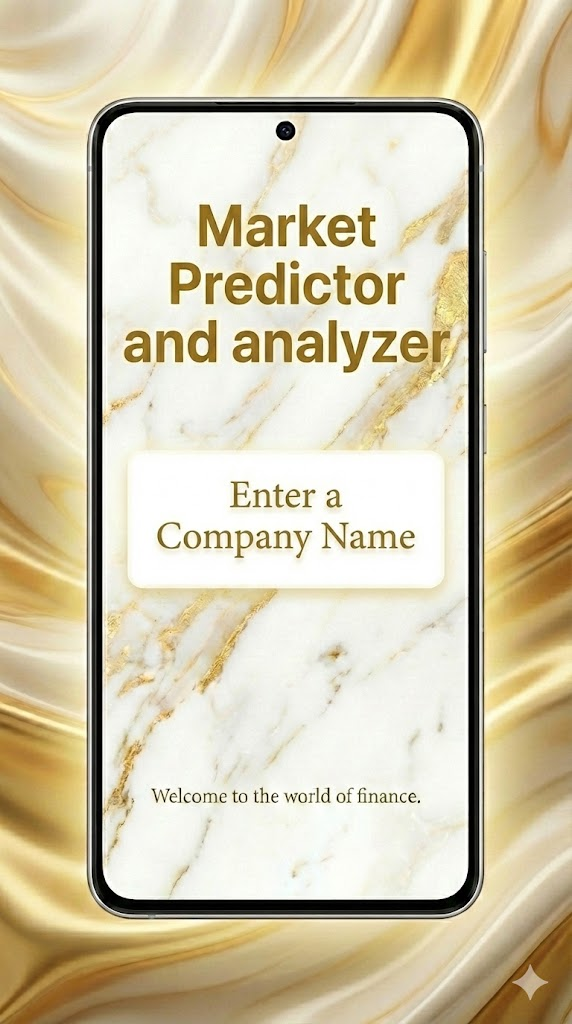

## ⚙️ settings




In [1]:
!pip install yfinance -q
!pip -q install groq
#here i have instaled yhoofinance and groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 3.6 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import requests
import os
from getpass import getpass
from groq import Groq
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
# here i have imported every lebbrry needed for the project

In [3]:
def get_exchange_rate(from_currency, to_currency):

    response = requests.get(f"https://api.exchangerate-api.com/v4/latest/{from_currency}")
    data = response.json()
    return data['rates'][to_currency.upper()]
# in this code i have identfied a new function that get me the exchange rate between any two currencies


In [4]:
def remove_all_spaces(text):
    return text.replace(" ","").replace("\n", "")
#in this code i have made a faction that del every spase or enter have been add into a data

In [5]:
if os.path.exists('settings.txt1'):
  pass
else:
  !wget -q 'https://drive.google.com/uc?export=download&id=1aMw8al6fucguc15pdoNcoLH5hhAnAy-y' -O 'settings.txt1'
# Here I have downloaded the settings file and named it settings.txt1. The code asks the computer if the file already exists. If it does, don't do anything, but if not, install it.

In [6]:
# This file, known as currency.txt, is not to be changed. It's just for calculations. The user should not touch this file.
!wget -q 'https://drive.google.com/uc?export=download&id=1d3NZk03LkV-rxSQpfNkFc20KxlR0j83f' -O 'currency.txt'

In [7]:
# in this code i got out the info from the files that i have uploded
file_path = "/content/settings.txt1"
with open(file_path, "r", encoding="utf-8") as f:
  for line in f :
    setting_splited = line.split(":")
    if remove_all_spaces(setting_splited[0]) == "days_to_analyze":
      days = remove_all_spaces(setting_splited[1])
    elif remove_all_spaces(setting_splited[0]) == "currency_code":
      wanted_currency = remove_all_spaces(setting_splited[1])
    else :
      break
 # in the codes above i have readed the settings text and got the settings information from it .
file_path2 = "/content/currency.txt"
math_srt = 0
with open(file_path2, "r", encoding="utf-8") as c:
  for line_c in c :
    currency_line_splited = line_c.split("-")
    if wanted_currency.upper() ==remove_all_spaces (currency_line_splited[0]) :
      math_srt = 1
    else :
      pass
if math_srt == 0 :
  print(f"The '{wanted_currency}' is not detected. Please change it in the settings file. ")
else :
  pass
  #also in the codes above i have readed the file currency

#print(days)
#type(days)== srt
#type(wanted_currency)== srt

## 🔍 Data Collection

In [8]:
# In this code, I take the company name from the user, check if it is real, use the Yahoo Finance API, and get the symbol of the company.
while True :
  company_name = remove_all_spaces(input("enter the company name that you are intrested on "))
  response = requests.get("https://query2.finance.yahoo.com/v1/finance/search", params={'q':company_name}, headers={'User-Agent': 'Mozilla/5.0'})
  data = response.json()
  if len(data['quotes'])>0:
    symbol = data['quotes'][0]['symbol']
    break
  else:
    print("This name is invalid, please re-enter the name.")

enter the company name that you are intrested on tesla


In [9]:
# in this code i use the the Ticker and history and info are used from the Yahoo Finance API
ticker = yf.Ticker(symbol)
#In this code, I use the Ticker, history, and info from the Yahoo Finance API.
History=ticker.history(f"{days}d")
#print (type(History)) = pandas this type of code we have lerned in week 13
stock_info = ticker.info
currency = stock_info.get('currency', 'Unknown')
exchange_rate = get_exchange_rate(currency,wanted_currency)

if len(History)>0:
  pass
else:
  print("No data found Check the symbol")

data= {"dates": History.index.strftime('%d-%m-%y').tolist(),
"prices": History['Close'].tolist(),
"volume": History['Volume'].tolist()}
# the function 'tolist' it convert the data from pandas (data frame ) to a list.

dates = data['dates']
prices = [price * exchange_rate for price in data['prices']]
print(f"Dates: {dates}")
print(f"Prices: {prices}")




Dates: ['16-01-26', '20-01-26', '21-01-26', '22-01-26', '23-01-26', '26-01-26', '27-01-26']
Prices: [437.5, 419.25, 431.44000244140625, 449.3599853515625, 449.05999755859375, 435.20001220703125, 435.4779052734375]


In [10]:
# in this codde i want to see the recomditon of the experts
recomdtion_data = ticker.recommendations_summary
# print(type(recomdtion_data))= <class 'pandas.core.frame.DataFrame'> it a talbe of data like excel we had lerned about it at week 13
if recomdtion_data is not None and not recomdtion_data.empty:
# in the code above it check if the data not empty ofr thier is no valoue
  latest = recomdtion_data.iloc[0]
# the function .iloc it get data from the pandas type of data  it took the firs clum of the recomdtion_data table and it is the same type of data pandas
# print((latest))
  buy = int(latest.get('strongBuy', 0) + latest.get('buy', 0))
  sell = int(latest.get('strongSell', 0) + latest.get('sell', 0))
  hold = int (latest.get('hold', 0))

  if buy > sell and buy > hold :
    fv_price = "Analysts Predict The Stock will go up "
    print(fv_price)
  elif sell > buy and sell > hold :
    fv_price = "Analysts Predict: The Stock will go down"
    print(fv_price )
  else :
    fv_price ="Analysts Predict: The Stock will stay stable"
    print(fv_price)
else:
  print(" No analyst data found for this stock.")

Analysts Predict The Stock will go up 


### 📰News API

In [11]:
# In this code, in general, I want to get the prices for the number of days that the user wants
my_api_key = "a33007f2bbd14c549399fac408a05e77"
url = "https://newsapi.org/v2/everything"

params = {
    "q": company_name,
    "apiKey": my_api_key,
    "language": "en",
    "sortBy": "publishedAt",
    "pageSize": 30
}
# the main block above i got it from the Abi website and i had modifyed it to fit my code
response = requests.get(url, params=params)
#print(type(response))
# APi cod requerment
if response.status_code == 200:
    data = response.json()
    raw_articles = data['articles']
    headlines = []

#the block of code above check if the get code from the api
    for article in raw_articles:
        title = article['title']
        if company_name.lower() in title.lower():
            headlines.append(title)
        if len(headlines) == 10:
            break
# in the block above i check if the company name is in the tetle fo the article if it is in i add it to an empty list
    if len(headlines) > 0:
        print(f"\n Found {len(headlines)} accurate articles:\n")
        for title in headlines:
            print(f"-{title}")
    else:
        print(" no articles fo the company name that you hade entered .")

else:
    print("Error")



 Found 6 accurate articles:

-Apple, Meta, Tesla to Report Earnings This Week: What to Watch
-World's cheapest Tesla launches at $29,000 and comes with plenty of compromise
-Tesla loses another manufacturing director as exodus continues
-Optimus as a household helper: Elon Musk plans to bring Tesla robots into private homes starting in 2027
-Retail Investors Dump Apple Stock While Nvidia, Tesla See Massive Inflows
-Binance to launch Tesla perpetual contract with up to 5x leverage


## 🧠 AI lamma

In [12]:
client = Groq(api_key="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")
LLAMA3_8B_INSTANT = "llama-3.1-8b-instant"
LLAMA3_70B_VERSATILE = "llama-3.3-70b-versatile"
DEFAULT_MODEL = LLAMA3_8B_INSTANT

In [13]:
# this code was copied from our class notebook (Week 12 Lesson 23) and after that i modifyed it to work with my code with the use of chat .
# the code in genral takes the title above and rate them with the use of ai it rate them from 10 to -10


sentiment_dict = {}

def ask_once(prompt, system_prompt, model):
    """
    This function sends the prompt to Groq and returns the answer.
    """
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ],
        model=model,
    )
    return chat_completion.choices[0].message.content

if not headlines :
    print(" No headlines found. Please try anothor comapny name  .")
else:
    print(f" Analyzing {len(headlines)} headlines using {DEFAULT_MODEL}...\n")


    for headline in headlines:

        #  Prompt
        prompt = f"""
        Analyze this headline: "{headline}"
        Rate sentiment from -10 (Negative) to 10 (Positive). 0 is Neutral.
        Reply with ONLY the integer number.
        """

        try:
            response_text = ask_once(
                prompt=prompt,
                system_prompt="You are a strict financial algorithm. Output integers only.",
                model=DEFAULT_MODEL
            )

            cleaned_string = "".join(char for char in str(response_text) if char.isdigit() or char == "-")

            if cleaned_string:
                try:
                    score = int(cleaned_string)
                    print(f" Headline: {headline}")
                    print(f" Score:    {score}")
                    print("\n")

                except:

                    score = 0
            else:
                score = 0
        except Exception as exc:
            print(f" Error processing AI response: {exc}")
            score = 0


        sentiment_dict[headline] = score


scores = list(sentiment_dict.values())
if len(headlines)> 0 :

      avg_of_sentiment_score = sum(scores) / len(scores)
else:
    avg_of_sentiment_score=0

 Analyzing 6 headlines using llama-3.1-8b-instant...

 Headline: Apple, Meta, Tesla to Report Earnings This Week: What to Watch
 Score:    4


 Headline: World's cheapest Tesla launches at $29,000 and comes with plenty of compromise
 Score:    -5


 Headline: Tesla loses another manufacturing director as exodus continues
 Score:    -7


 Headline: Optimus as a household helper: Elon Musk plans to bring Tesla robots into private homes starting in 2027
 Score:    6


 Headline: Retail Investors Dump Apple Stock While Nvidia, Tesla See Massive Inflows
 Score:    0


 Headline: Binance to launch Tesla perpetual contract with up to 5x leverage
 Score:    4




In [14]:

    prices_str = str(prices)
    current_price = prices[-1]

    prediction_prompt = f"""
    You are a Senior Financial Risk Analyst.

    Context for company: {company_name}
    1. Recent Prices: {prices_str}
    2. Current Price: {current_price}
    3. Math Trend Prediction: {fv_price}
    4. AI News Sentiment Score: {avg_of_sentiment_score} (Scale: -10 to 10)

    Task:
    Predict the future price for tomorrow by combining the Math Trend with the News Sentiment.
    also at the end dont add any notes
    Please provide your answer in this exact format:

    PREDICTION REPORT
    --------------------------------
    Predicted Price: [Number]
    Confidence Level: [0-100]%
    Confidence Interval: [Low] - [High]
    Reasoning: [One short sentence explaining why]
    --------------------------------

    """



    # 4. Ask the AI
    try:
        response = ask_once(
            prompt=prediction_prompt,
            system_prompt="You are a helpful financial assistant.",
            model=DEFAULT_MODEL
        )

        # 5. Show the Result (Direct print, no processing needed)

        print(response)

    except Exception as e:
        print(f" Error: {e}")



PREDICTION REPORT
--------------------------------
Predicted Price: 443.25
Confidence Level: 82%
Confidence Interval: 428.5 - 457.95
Reasoning: The prediction combines the analysts' math trend of the stock going up with a moderate news sentiment score to estimate a slight increase in the stock price tomorrow.

--------------------------------


## 📊 Graph

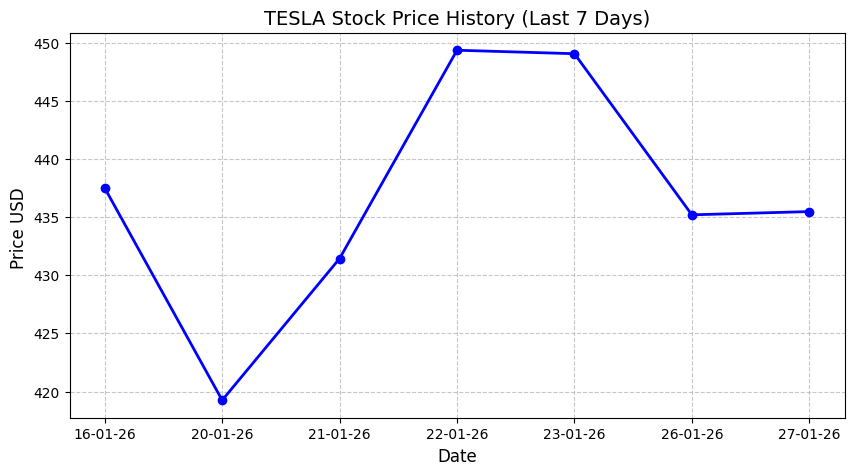

In [26]:
# this graph in genral show the user the prices stock of the amount of wanted days that the user wants
# The graph have been made by chat .

if dates and prices: # Check if both lists are not empty
    # Draw Graph
    plt.figure(figsize=(10, 5))
    plt.plot(dates, prices, color='blue', marker='o', linestyle='-', linewidth=2)

    # Labels
    plt.title(f"{company_name.upper()} Stock Price History (Last {days} Days)", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(f"Price {wanted_currency} ", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()
else:
    print("❌ No stock data found. Run Step 4 first.")

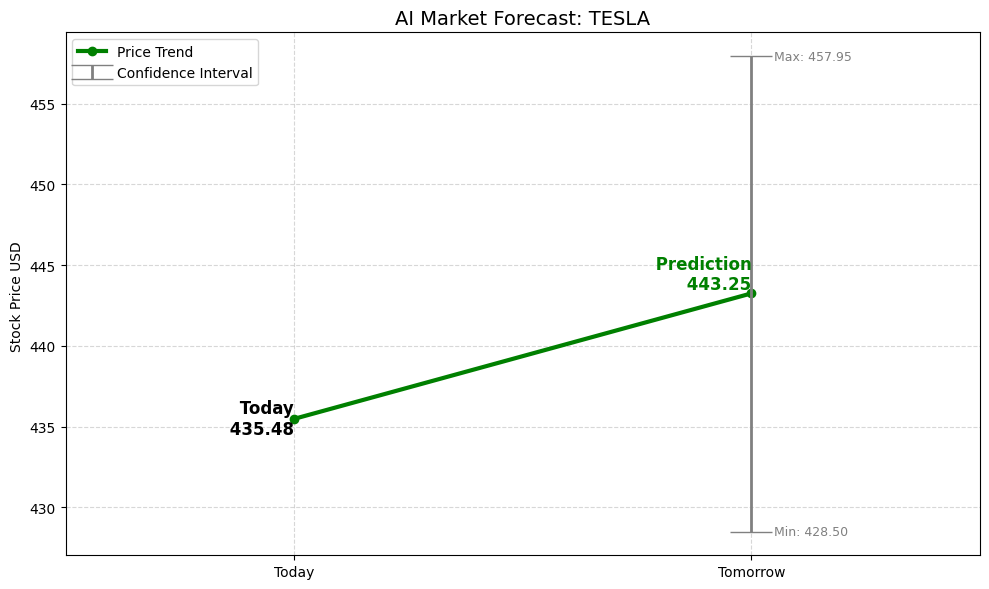

In [22]:
# the graph have been made by chat
# this sgraph show the predction of the price of the stock for tomorrow


# 1. Check if variables exist
if 'response' in locals() and 'current_price' in locals():

    # Initialize variables to store our findings
    pred_price = None
    low_ci = None
    high_ci = None

    # 2. Parse the Text (Line by Line)
    # We split the big text block into individual lines
    lines = response.split('\n')

    for line in lines:
        line = line.strip()

        # A. Find "Predicted Price"
        if "Predicted Price:" in line:
            # Split at the colon: "Predicted Price: 251.15" -> ["Predicted Price", " 251.15"]
            parts = line.split(":")
            if len(parts) > 1:
                try:
                    # Clean up the string and convert to float
                    clean_num = parts[1].strip().replace('$', '').replace(',', '')
                    pred_price = float(clean_num)
                except:
                    pass

        # B. Find "Confidence Interval"
        if "Confidence Interval:" in line:
            # Expected: "Confidence Interval: 245.85 - 256.45"
            parts = line.split(":")
            if len(parts) > 1:
                range_str = parts[1].strip() # "245.85 - 256.45"

                # Split at the dash "-"
                if "-" in range_str:
                    bounds = range_str.split("-")
                    try:
                        low_str = bounds[0].strip().replace('$', '').replace(',', '')
                        high_str = bounds[1].strip().replace('$', '').replace(',', '')
                        low_ci = float(low_str)
                        high_ci = float(high_str)
                    except:
                        pass

    # 3. Draw the Graph (Only if we found the numbers)
    if pred_price is not None:

        plt.figure(figsize=(10, 6))

        # Data Points
        x_labels = ["Today", "Tomorrow"]
        y_values = [current_price, pred_price]

        # Determine Color: Green if UP, Red if DOWN
        color = 'green' if pred_price >= current_price else 'red'

        # A. Plot the Main Line connecting Today -> Tomorrow
        plt.plot(x_labels, y_values, marker='o', linestyle='-', color=color, linewidth=3, label='Price Trend')

        # B. Draw the Confidence Interval (The "Error Bar")
        if low_ci is not None and high_ci is not None:
            # Calculate the distance from the center point
            lower_error = pred_price - low_ci
            upper_error = high_ci - pred_price

            plt.errorbar(x=["Tomorrow"], y=[pred_price],
                         yerr=[[lower_error], [upper_error]],
                         fmt='none', ecolor='gray', capsize=15, elinewidth=2, label='Confidence Interval')

            # Label the High and Low limits
            plt.text(1.05, high_ci, f"Max: {high_ci:.2f}", fontsize=9, color='gray', va='center')
            plt.text(1.05, low_ci, f"Min: {low_ci:.2f}", fontsize=9, color='gray', va='center')

        # C. Add Price Labels on the graph
        plt.text(0, current_price, f" Today\n {current_price:.2f}", ha='right', va='center', fontsize=12, fontweight='bold')
        plt.text(1, pred_price, f" Prediction\n {pred_price:.2f}", ha='right', va='bottom', fontsize=12, fontweight='bold', color=color)

        # D. Formatting
        plt.title(f"AI Market Forecast: {company_name .upper() if 'company_name' in locals() else 'Stock'}", fontsize=14)
        plt.ylabel(f"Stock Price {wanted_currency} ")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend()

        # Remove extra white space on sides
        plt.xlim(-0.5, 1.5)

        plt.tight_layout()
        plt.show()

    else:
        print(" Could not find 'Predicted Price' in the AI response.")
        print("Please check if the AI output matches the requested format.")

else:
    print(" Missing Data. Ensure 'response' and 'current_price' variables are defined.")

🔎 Fetching latest analyst data for TSLA...


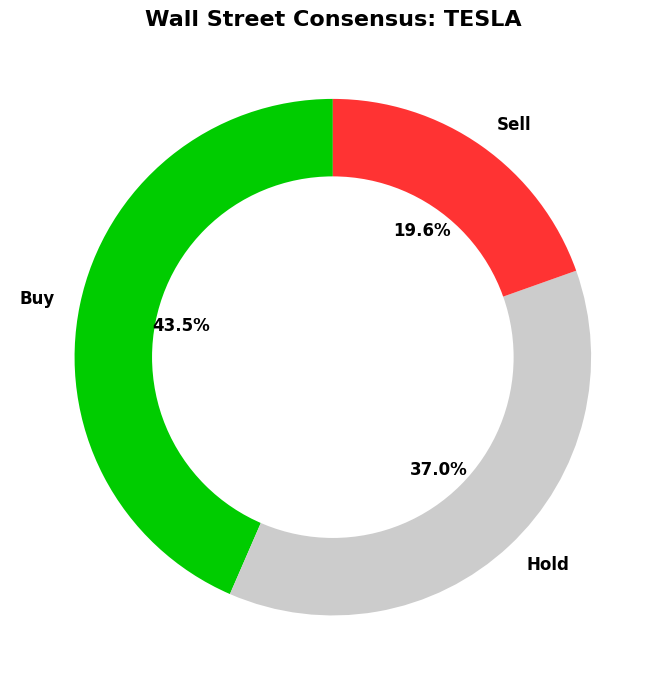

✅ Total Analyst Votes: 46


In [23]:
# this graph shows the votes of the analists
# the graph made by chat
if 'symbol' in locals():
    print(f"🔎 Fetching latest analyst data for {symbol}...")

    try:
        ticker = yf.Ticker(symbol)
        rec_data = ticker.recommendations_summary

        if rec_data is not None and not rec_data.empty:
            # 1. Get the latest month's data
            latest = rec_data.iloc[0]

            # 2. Group the votes into 3 categories
            buy_votes = latest.get('strongBuy', 0) + latest.get('buy', 0)
            hold_votes = latest.get('hold', 0)
            sell_votes = latest.get('strongSell', 0) + latest.get('sell', 0)

            # Prepare data for the Pie Chart
            votes = [buy_votes, hold_votes, sell_votes]
            labels = ['Buy', 'Hold', 'Sell']
            colors = ['#00cc00', '#cccccc', '#ff3333'] # Green, Gray, Red

            # Filter out zero values (so we don't have empty labels)
            final_votes = []
            final_labels = []
            final_colors = []

            for i in range(len(votes)):
                if votes[i] > 0:
                    final_votes.append(votes[i])
                    final_labels.append(labels[i])
                    final_colors.append(colors[i])

            if final_votes:
                # 3. Draw the Pie Chart
                plt.figure(figsize=(7, 7))

                # 'autopct' adds the percentage text inside the slices
                plt.pie(final_votes, labels=final_labels, colors=final_colors,
                        autopct='%1.1f%%', startangle=90,
                        textprops={'fontsize': 12, 'fontweight': 'bold'})

                # Add a circle in the middle to make it a "Donut Chart" (Looks modern)
                centre_circle = plt.Circle((0,0), 0.70, fc='white')
                fig = plt.gcf()
                fig.gca().add_artist(centre_circle)

                # Title
                name = company_name if 'company_name' in locals() else symbol
                plt.title(f"Wall Street Consensus: {name.upper()}", fontsize=16, fontweight='bold')

                plt.tight_layout()
                plt.show()

                print(f"✅ Total Analyst Votes: {int(sum(votes))}")

            else:
                print("⚠️ Analysts have no strong data (0 votes).")
        else:
            print("⚠️ No analyst recommendations found for this stock.")

    except Exception as e:
        print(f"❌ Error fetching data: {e}")
else:
    print("❌ Symbol not found. Please run Step 1 first.")

## 💾 File Saving

In [18]:
# in this code i have saved an output for the most meaningfull outputs
file_content = ""
file_content+=f"prices in {wanted_currency} : {prices}"
for headline, score in sentiment_dict.items():
  file_content+= f" Headline: {headline}\n"
  file_content+= f"Score:    {score}\n"
  file_content+= "\n"
file_content += f"Today price {current_price}"
file_content +=response

with open("output_report.txt", "w", encoding="utf-8") as z:
    z.write(file_content)

##


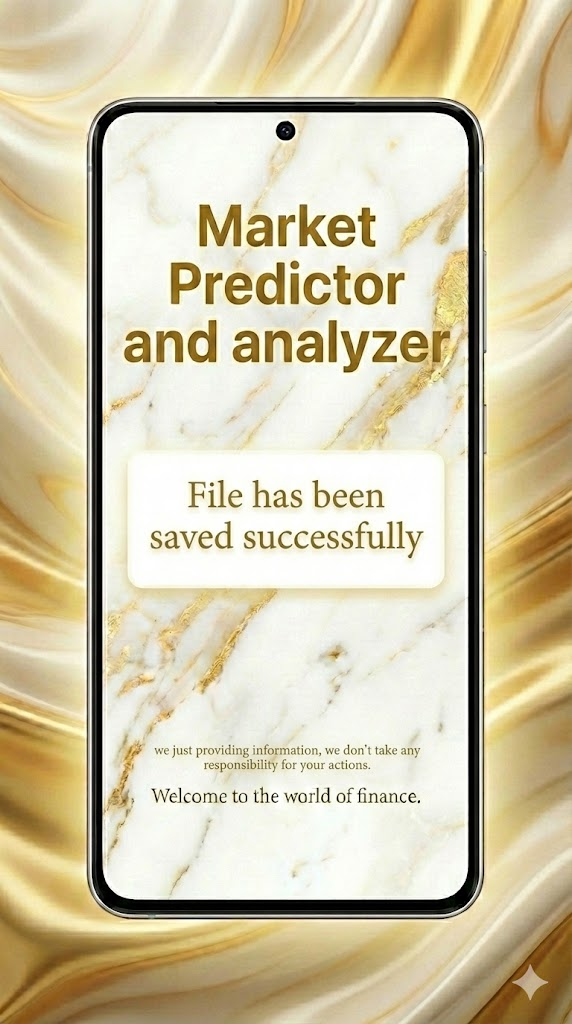